# **Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import optuna
from sklearn.ensemble import StackingClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import RandomOverSampler
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.decomposition import PCA
from vecstack import stacking


# **Importing required datasets**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Weather_forecast/wtrain_data.csv')
test=pd.read_csv('/content/drive/MyDrive/Weather_forecast/wtest_data.csv')
labels_df = pd.read_csv("/content/drive/MyDrive/Weather_forecast/Train/solution_train.csv",sep=',')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(f' Shape of  Dataset: {df.shape}')

 Shape of  Dataset: (566, 52)


In [ ]:
df.head()

,date,label,avg.temp_A,avg.temp_B,avg.temp_C,avg.temp_D,avg.temp_E,avg.wind.speed_A,avg.wind.speed_B,avg.wind.speed_C,avg.wind.speed_D,avg.wind.speed_E,max.inst.wind.speed_A,max.inst.wind.speed_B,max.inst.wind.speed_C,max.inst.wind.speed_D,max.inst.wind.speed_E,max.inst.wind.speed.dir_A,max.inst.wind.speed.dir_B,max.inst.wind.speed.dir_C,max.inst.wind.speed.dir_D,max.inst.wind.speed.dir_E,max.temp_A,max.temp_B,max.temp_C,max.temp_D,max.temp_E,max.wind.speed_A,max.wind.speed_B,max.wind.speed_C,max.wind.speed_D,max.wind.speed_E,max.wind.speed.dir_A,max.wind.speed.dir_B,max.wind.speed.dir_C,max.wind.speed.dir_D,max.wind.speed.dir_E,min.atmos.pressure_A,min.atmos.pressure_B,min.atmos.pressure_C,min.atmos.pressure_D,min.atmos.pressure_E,min.temp_A,min.temp_B,min.temp_C,min.temp_D,min.temp_E,precipitation_A,precipitation_B,precipitation_C,precipitation_D,precipitation_E
0,00173aec,2,18.7,17.6,16.9,19.5,14.3,1.6,1.8,0.9,1.2,0.5,7.5,11.1,5.5,6.9,3.6,3,1,6,6,7,25.0,23.7,23.9,26.7,21.1,5.0,5.8,2.3,3.5,1.9,3,2,6,6,6,1006.7,1010.216254,1010.216254,1010.216254,1010.216254,14.9,12.5,12.9,16.4,9.0,1.0,1.5,1.5,0.0,4.5
1,0083f291,1,13.1,12.6,12.0,13.0,10.7,1.4,1.0,0.7,0.7,0.6,6.7,6.7,5.6,4.0,8.1,7,6,1,6,7,15.8,15.0,13.7,14.9,13.9,4.2,3.6,1.8,1.9,2.9,6,6,1,6,3,1000.6,1010.216254,1010.216254,1010.216254,1010.216254,11.3,11.1,10.6,12.1,8.5,50.0,46.5,49.0,45.5,63.0
2,014cfe7b,2,19.9,19.0,17.5,19.9,16.2,3.7,3.6,0.7,1.3,1.1,14.5,14.6,12.0,9.2,11.2,7,5,7,3,3,24.2,23.9,21.0,25.8,19.1,11.3,8.6,2.6,4.6,2.9,7,5,7,6,3,1004.6,1010.216254,1010.216254,1010.216254,1010.216254,16.1,13.5,15.8,16.3,12.4,18.0,17.0,63.5,19.0,32.0
3,01947c8e,2,21.6,20.2,20.5,21.3,17.6,1.6,1.2,1.1,1.0,0.6,7.3,7.4,5.8,5.5,4.9,6,6,6,6,5,29.0,29.0,27.7,29.3,25.2,4.9,3.8,2.1,3.2,2.0,6,4,6,6,4,1011.0,1010.216254,1010.216254,1010.216254,1010.216254,15.8,14.2,15.5,15.9,11.5,0.0,1.0,0.0,0.0,0.0
4,0258884d,2,15.2,13.9,13.9,15.8,11.1,2.5,2.3,1.2,1.8,0.7,10.0,10.3,7.3,7.2,5.0,7,4,6,6,2,21.9,22.4,21.0,22.4,17.2,6.8,5.4,3.3,4.5,2.2,3,6,6,6,3,1020.1,1010.216254,1010.216254,1010.216254,1010.216254,10.3,5.6,8.9,10.4,5.3,0.0,0.0,0.0,0.0,0.0


In [ ]:
test.head()

,date,avg.temp_A,avg.temp_B,avg.temp_C,avg.temp_D,avg.temp_E,avg.wind.speed_A,avg.wind.speed_B,avg.wind.speed_C,avg.wind.speed_D,avg.wind.speed_E,max.inst.wind.speed_A,max.inst.wind.speed_B,max.inst.wind.speed_C,max.inst.wind.speed_D,max.inst.wind.speed_E,max.inst.wind.speed.dir_A,max.inst.wind.speed.dir_B,max.inst.wind.speed.dir_C,max.inst.wind.speed.dir_D,max.inst.wind.speed.dir_E,max.temp_A,max.temp_B,max.temp_C,max.temp_D,max.temp_E,max.wind.speed_A,max.wind.speed_B,max.wind.speed_C,max.wind.speed_D,max.wind.speed_E,max.wind.speed.dir_A,max.wind.speed.dir_B,max.wind.speed.dir_C,max.wind.speed.dir_D,max.wind.speed.dir_E,min.atmos.pressure_A,min.atmos.pressure_B,min.atmos.pressure_C,min.atmos.pressure_D,min.atmos.pressure_E,min.temp_A,min.temp_B,min.temp_C,min.temp_D,min.temp_E,precipitation_A,precipitation_B,precipitation_C,precipitation_D,precipitation_E
0,0001f2fd,21.1,20.7,20.4,21.4,18.4,1.1,0.9,0.6,0.9,0.5,5.2,5.6,5.0,5.4,4.3,3,2,6,6,7,27.8,27.7,27.7,27.8,25.1,4.1,3.0,2.0,3.3,1.7,3,1,6,6,4,1008.5,1010.216254,1010.216254,1010.216254,1010.216254,17.2,16.8,17.3,18.2,14.7,41.5,23.5,38.0,39.5,54.5
1,00177dc1,20.6,20.5,19.1,21.1,17.8,1.7,1.4,0.8,1.0,0.5,7.0,6.1,5.7,5.6,3.9,3,4,6,6,0,26.4,27.0,26.2,25.7,23.8,4.8,4.1,2.2,3.0,1.4,3,2,6,6,3,997.6,1010.216254,1010.216254,1010.216254,1010.216254,18.3,17.1,15.4,18.8,13.3,38.0,20.5,33.5,34.5,30.5
2,00b3a048,7.8,6.4,7.2,8.0,4.8,1.5,3.1,0.7,0.6,0.4,6.4,10.6,5.8,6.6,3.5,6,1,6,2,4,12.0,11.4,12.2,11.3,10.5,4.3,6.8,2.5,3.2,2.0,6,2,6,0,4,1019.6,1010.216254,1010.216254,1010.216254,1010.216254,3.9,1.4,3.8,6.1,-0.2,4.0,8.0,4.5,11.5,8.0
3,013f131b,29.0,27.8,27.2,28.2,23.9,2.4,1.8,0.9,1.7,0.5,9.9,8.9,6.5,7.1,4.6,6,4,6,6,4,36.1,35.2,34.0,36.3,31.7,6.7,4.3,2.9,4.1,1.6,4,4,6,6,6,1006.8,1010.216254,1010.216254,1010.216254,1010.216254,24.5,22.2,22.5,22.3,18.8,0.0,0.0,0.0,0.0,0.0
4,01a1b150,9.3,9.2,8.8,10.2,6.9,0.9,1.9,0.9,0.8,0.3,4.8,7.4,5.9,5.3,2.7,4,2,3,6,5,11.6,13.7,12.4,13.5,9.5,3.3,4.8,1.8,2.9,1.2,4,2,2,6,4,1013.4,1010.216254,1010.216254,1010.216254,1010.216254,7.5,5.6,5.9,8.7,4.3,0.0,0.5,0.5,2.0,1.5


### Performing feature elimination by dropping minimum atmoshpheric pressure columns as they are empty and contain NaN values.

In [ ]:
df = df.drop(['min.atmos.pressure_A', 'min.atmos.pressure_B', 'min.atmos.pressure_C',
              'min.atmos.pressure_D', 'min.atmos.pressure_E'], axis=1)

In [ ]:
test = test.drop(['min.atmos.pressure_A', 'min.atmos.pressure_B', 'min.atmos.pressure_C',
              'min.atmos.pressure_D', 'min.atmos.pressure_E'], axis=1)

# **Exploratory Data Analysis**


## **Descriptive Statistics**

In [ ]:
df.columns

Index(['date', 'label', 'avg.temp_A', 'avg.temp_B', 'avg.temp_C', 'avg.temp_D',
       'avg.temp_E', 'avg.wind.speed_A', 'avg.wind.speed_B',
       'avg.wind.speed_C', 'avg.wind.speed_D', 'avg.wind.speed_E',
       'max.inst.wind.speed_A', 'max.inst.wind.speed_B',
       'max.inst.wind.speed_C', 'max.inst.wind.speed_D',
       'max.inst.wind.speed_E', 'max.inst.wind.speed.dir_A',
       'max.inst.wind.speed.dir_B', 'max.inst.wind.speed.dir_C',
       'max.inst.wind.speed.dir_D', 'max.inst.wind.speed.dir_E', 'max.temp_A',
       'max.temp_B', 'max.temp_C', 'max.temp_D', 'max.temp_E',
       'max.wind.speed_A', 'max.wind.speed_B', 'max.wind.speed_C',
       'max.wind.speed_D', 'max.wind.speed_E', 'max.wind.speed.dir_A',
       'max.wind.speed.dir_B', 'max.wind.speed.dir_C', 'max.wind.speed.dir_D',
       'max.wind.speed.dir_E', 'min.temp_A', 'min.temp_B', 'min.temp_C',
       'min.temp_D', 'min.temp_E', 'precipitation_A', 'precipitation_B',
       'precipitation_C', 'precipitation_D', 'p

# **Data Visualization**

## **Distributions**

In [ ]:
df['label'].value_counts()

2    354
1    165
0     47
Name: label, dtype: int64

## The labels are mapped to numeric:  

"2" - N label (No-rain)

"1" - L label (Light-rain) 

"0" - H label (Heavy-rain)

<Axes: xlabel='Count', ylabel='label'>

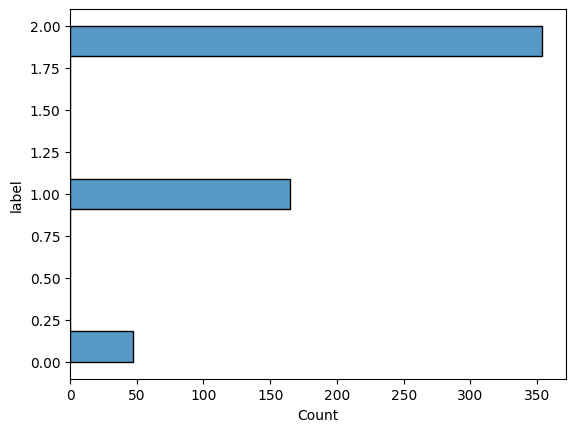

In [ ]:
# histplot
sns.histplot(y=df['label'])

<Axes: xlabel='count', ylabel='label'>

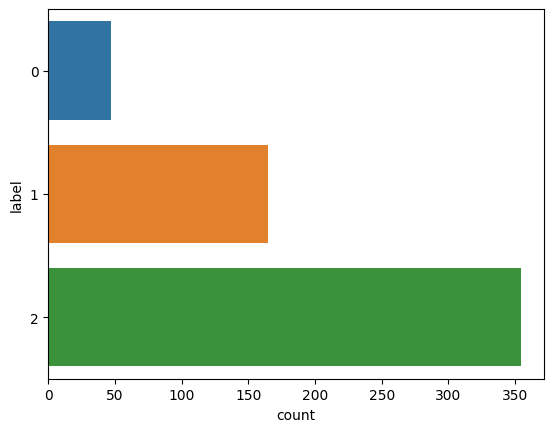

In [ ]:
# countplot
sns.countplot(y=df['label'])

## **Missing Value Imputation**

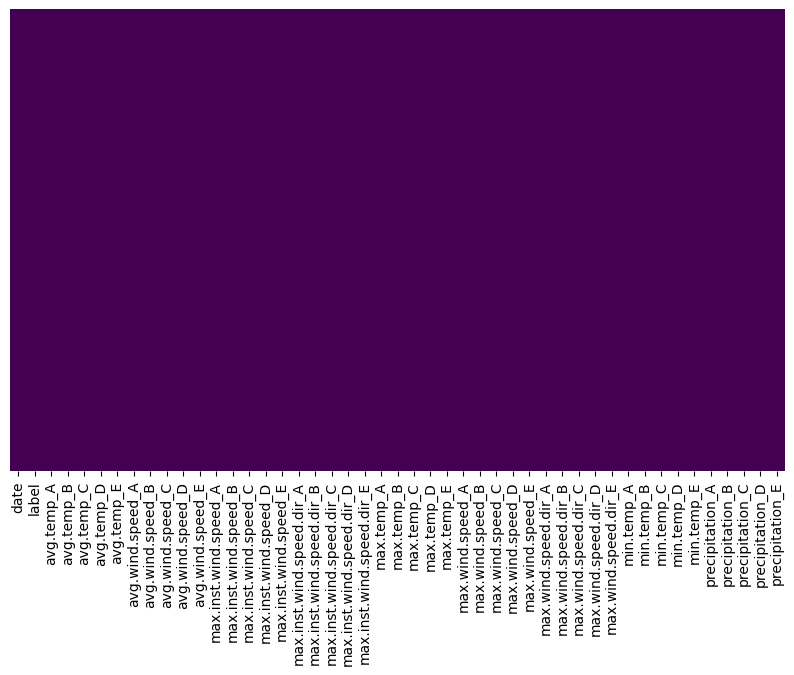

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False);

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

date                         0
max.wind.speed.dir_D         0
max.temp_E                   0
max.wind.speed_A             0
max.wind.speed_B             0
max.wind.speed_C             0
max.wind.speed_D             0
max.wind.speed_E             0
max.wind.speed.dir_A         0
max.wind.speed.dir_B         0
max.wind.speed.dir_C         0
max.wind.speed.dir_E         0
max.temp_C                   0
min.temp_A                   0
min.temp_B                   0
min.temp_C                   0
min.temp_D                   0
min.temp_E                   0
precipitation_A              0
precipitation_B              0
precipitation_C              0
precipitation_D              0
max.temp_D                   0
max.temp_B                   0
label                        0
avg.wind.speed_E             0
avg.temp_A                   0
avg.temp_B                   0
avg.temp_C                   0
avg.temp_D                   0
avg.temp_E                   0
avg.wind.speed_A             0
avg.wind

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       566 non-null    object 
 1   label                      566 non-null    int64  
 2   avg.temp_A                 566 non-null    float64
 3   avg.temp_B                 566 non-null    float64
 4   avg.temp_C                 566 non-null    float64
 5   avg.temp_D                 566 non-null    float64
 6   avg.temp_E                 566 non-null    float64
 7   avg.wind.speed_A           566 non-null    float64
 8   avg.wind.speed_B           566 non-null    float64
 9   avg.wind.speed_C           566 non-null    float64
 10  avg.wind.speed_D           566 non-null    float64
 11  avg.wind.speed_E           566 non-null    float64
 12  max.inst.wind.speed_A      566 non-null    float64
 13  max.inst.wind.speed_B      566 non-null    float64

# **Examining numerical features**

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
print(numeric_features.columns)

Index(['label', 'avg.temp_A', 'avg.temp_B', 'avg.temp_C', 'avg.temp_D',
       'avg.temp_E', 'avg.wind.speed_A', 'avg.wind.speed_B',
       'avg.wind.speed_C', 'avg.wind.speed_D', 'avg.wind.speed_E',
       'max.inst.wind.speed_A', 'max.inst.wind.speed_B',
       'max.inst.wind.speed_C', 'max.inst.wind.speed_D',
       'max.inst.wind.speed_E', 'max.inst.wind.speed.dir_A',
       'max.inst.wind.speed.dir_B', 'max.inst.wind.speed.dir_C',
       'max.inst.wind.speed.dir_D', 'max.inst.wind.speed.dir_E', 'max.temp_A',
       'max.temp_B', 'max.temp_C', 'max.temp_D', 'max.temp_E',
       'max.wind.speed_A', 'max.wind.speed_B', 'max.wind.speed_C',
       'max.wind.speed_D', 'max.wind.speed_E', 'max.wind.speed.dir_A',
       'max.wind.speed.dir_B', 'max.wind.speed.dir_C', 'max.wind.speed.dir_D',
       'max.wind.speed.dir_E', 'min.temp_A', 'min.temp_B', 'min.temp_C',
       'min.temp_D', 'min.temp_E', 'precipitation_A', 'precipitation_B',
       'precipitation_C', 'precipitation_D', 'precipita

# **Data preprocessing**

## **Data Splitting**

In [ ]:
X = df.drop(['date','label'],axis=1)
y = df['label']

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (566, 45) 
 y_shape: (566,)


# **Feature Selection Technique**


## **Random Forest Importance**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=32)
rfe_selector = RFE(estimator=rf_clf, n_features_to_select=20, step=5, verbose=5)
rfe_selector.fit(X, y)

Fitting estimator with 45 features.
Fitting estimator with 40 features.
Fitting estimator with 35 features.
Fitting estimator with 30 features.
Fitting estimator with 25 features.


RFE(estimator=RandomForestClassifier(n_estimators=32), n_features_to_select=20,
    step=5, verbose=5)

### The code performs the following operations:

**rf_clf = RandomForestClassifier(n_estimators=32)** - This creates a new instance of the Random Forest Classifier from scikit-learn with 32 decision trees as estimators.

**rfe_selector = RFE(estimator=rf_clf, n_features_to_select=20, step=5, verbose=5)** - This creates a new instance of the Recursive Feature Elimination selector from scikit-learn. The estimator argument specifies the estimator to be used for feature selection, which in this case is the rf_clf Random Forest Classifier. The n_features_to_select argument specifies the number of features to select, which in this case is 20. The step argument specifies the number of features to remove at each iteration, which in this case is 5. Finally, the verbose argument specifies the level of verbosity during feature selection, which in this case is set to 5 (i.e., very verbose).

**rfe_selector.fit(X, y)** - This fits the RFE selector to the X and y data using the fit() method. After this line of code is executed, rfe_selector will be a trained feature selection object that can be used to transform the data into a subset of the original features that were deemed most important by the feature selection algorithm.

### **Now Printing selected features**

In [ ]:
rfe_support = rfe_selector.get_support()

rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(rfe_feature)
print('*******************************************************************************************')
print(str(len(rfe_feature)), 'selected features')

['avg.temp_D', 'avg.wind.speed_D', 'avg.wind.speed_E', 'max.inst.wind.speed_A', 'max.inst.wind.speed_B', 'max.inst.wind.speed_C', 'max.inst.wind.speed_D', 'max.inst.wind.speed_E', 'max.temp_D', 'max.wind.speed_A', 'max.wind.speed_B', 'max.wind.speed_D', 'max.wind.speed_E', 'min.temp_A', 'min.temp_B', 'min.temp_C', 'min.temp_E', 'precipitation_A', 'precipitation_D', 'precipitation_E']
*******************************************************************************************
20 selected features


In [ ]:
X  = df[rfe_feature]
y = df['label']

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (566, 20) 
 y_shape: (566,)


In [ ]:
y.value_counts()

2    354
1    165
0     47
Name: label, dtype: int64

# **Performing Over-Sampling to deal with Imbalanced Data**

In [ ]:
rs = RandomOverSampler()
X_resample, y_resample = rs.fit_resample(X,y)

print(f' Shape of X after Oversampling: {X_resample.shape} \n Shape of y after Oversampling: {y_resample.shape}')

 Shape of X after Oversampling: (1062, 20) 
 Shape of y after Oversampling: (1062,)


In [ ]:
y_resample.value_counts()

2    354
1    354
0    354
Name: label, dtype: int64

# **Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_rescale = scl.fit_transform(X_resample)

## **Data Splitting into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_rescale,y_resample,test_size=0.20,shuffle=True,random_state=21)
print(f' Shape of X_train: {X_train_res.shape} & Shape of X_test: {X_test_res.shape}')
print(f' Shape of y_train: {y_train_res.shape} & Shape of y_test: {y_test_res.shape}')

 Shape of X_train: (849, 20) & Shape of X_test: (213, 20)
 Shape of y_train: (849,) & Shape of y_test: (213,)


# **Model Selection**

## 1. **XGBoost Classifier**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_res = scaler.transform(X_test_res)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train_res, y_train_res);

In [ ]:
XGBClassifierScore = xgb.score(X_test_res,y_test_res)
print("Accuracy obtained by XGB Classifier model:", XGBClassifierScore*100)

Accuracy obtained by XGB Classifier model: 83.56807511737088


### **Summary** 

#### This code standardizes the input features, trains an XGBoost Classifier model on the standardized training data, evaluates the accuracy of the model on the standardized testing data, and prints out a classification report for the model on the testing data. The model achieved an accuracy of 83.56807511737088% on the testing data.

In [ ]:
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
y_pred_xgb = xgb.predict(X_test_res)
print(metrics.classification_report(y_test_res, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        75
           1       0.78      0.78      0.78        67
           2       0.82      0.72      0.77        71

    accuracy                           0.84       213
   macro avg       0.83      0.83      0.83       213
weighted avg       0.83      0.84      0.83       213



#### The XGBoost Classifier achieved an overall accuracy of 84%, as shown by the "accuracy" line at the bottom of the report. The precision, recall, and F1-score for each class are shown in the table.

## 2. **RandomForest Classifier**

In [ ]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_res, y_train_res)
y_pred_test_res = rf_clf.predict(X_test_res)
y_pred_train_res = rf_clf.predict(X_train_res)

In [ ]:
print('Accuracy score of Train after Oversampling: {}'.format(accuracy_score(y_train_res,y_pred_train_res)*100))
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,y_pred_test_res)*100))

Accuracy score of Train after Oversampling: 100.0
Accuracy score of Test after Oversampling: 86.3849765258216


### **Summary** 

#### This code trains a Random Forest Classifier model on oversampled training data and evaluates its performance on both the training and testing data. The model achieved an accuracy of 100% on the oversampled training data and an accuracy of 86.38% on the testing data. These results suggest that the model may be overfitting to the training data, but still performs well on the testing data. Further evaluation and tuning may be necessary to improve the model's performance on unseen data.

### **Hyperparamter tuning using optuna**

In [ ]:
def objective(trial):
    param_grid = dict(
    criterion = trial.suggest_categorical('criterion', ['gini','entropy']),
    bootstrap = trial.suggest_categorical('bootstrap',['True','False']),
    max_depth = trial.suggest_int('max_depth', 1, 10000),
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000),
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000),
    random_state = trial.suggest_categorical('random_state', [45])
    )
    
    rf_clf = RandomForestClassifier(**param_grid )
    scores = cross_val_score(rf_clf, X_train_res, y_train_res, cv=5, scoring='accuracy')
    return scores.mean().round(5)

In [ ]:
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=2, show_progress_bar=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import optuna

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 30, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 100)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000),

    rf_clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        criterion=criterion,
        bootstrap=bootstrap,
        random_state=45,
    )

    scores = cross_val_score(rf_clf, X_train_res, y_train_res, cv=5, scoring="accuracy")

    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2, show_progress_bar=True)


[I 2023-04-27 22:57:27,944] A new study created in memory with name: no-name-07c08a41-c4cc-4c33-b49c-98f030465c78
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/2 [00:00<?, ?it/s]

[I 2023-04-27 22:57:59,190] Trial 0 finished with value: 0.8481099895579535 and parameters: {'n_estimators': 959, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': False, 'max_features': 'log2', 'max_leaf_nodes': 2898}. Best is trial 0 with value: 0.8481099895579535.
[I 2023-04-27 22:58:05,675] Trial 1 finished with value: 0.8669404803341454 and parameters: {'n_estimators': 282, 'max_depth': 58, 'criterion': 'entropy', 'bootstrap': False, 'max_features': 'auto', 'max_leaf_nodes': 9675}. Best is trial 1 with value: 0.8669404803341454.


In [ ]:
best_params_rf = study.best_trial.params
print('Best parameters:', best_params_rf)
print('Best score: {:.2f}%'.format(study.best_value*100))

Best parameters: {'n_estimators': 282, 'max_depth': 58, 'criterion': 'entropy', 'bootstrap': False, 'max_features': 'auto', 'max_leaf_nodes': 9675}
Best score: 86.69%


In [ ]:
rf_clf = RandomForestClassifier(**best_params_rf).fit(X_train_res,y_train_res)
y_pred_rf = rf_clf.predict(X_test_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print('Accuracy score of Test: ', accuracy_score(y_test_res, y_pred_rf)*100)

Accuracy score of Test:  87.32394366197182


### **Summary**  

#### This code uses Optuna to perform hyperparameter tuning for a Random Forest Classifier model. The objective function defines the hyperparameters to optimize and the create_study() function creates a study object for the optimization process. The optimize() method is used to optimize the hyperparameters, and the best hyperparameters and accuracy score are printed out. The accuracy score obtained is 87.324%

In [ ]:
unique, counts = np.unique(y_pred_rf, return_counts=True)

print (np.asarray((unique, counts)))

[[ 0  1  2]
 [81 58 74]]


In [ ]:
print(classification_report(y_test_res, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        75
           1       0.86      0.75      0.80        67
           2       0.82      0.86      0.84        71

    accuracy                           0.87       213
   macro avg       0.87      0.87      0.87       213
weighted avg       0.87      0.87      0.87       213




#### The macro average of precision, recall, and F1-score is 0.87, which is the average of these metrics across all classes, while the weighted average is also 0.87, which is the weighted average of these metrics across all classes.

## 3. **LGBM Classifier**

In [ ]:
def objective(trial):
    param_grid = dict(n_estimators=trial.suggest_int('n_estimators', 20, 1000, 10), 
                      learning_rate=trial.suggest_float('learning_rate', 0, 1), 
                      max_depth=trial.suggest_int('max_depth', 3, 12),
                      random_state = trial.suggest_categorical('random_state', [45]))
    clf = LGBMClassifier(**param_grid)
    scores = cross_val_score(clf, X_train_res, y_train_res, cv=5, scoring='accuracy')
    return scores.mean().round(5)

study = optuna.create_study(direction='maximize')


study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2023-04-27 22:58:06,942] A new study created in memory with name: no-name-05d5ed0e-cf1b-4f00-8bb6-cc1d7e9318db
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-04-27 22:58:09,833] Trial 0 finished with value: 0.85041 and parameters: {'n_estimators': 760, 'learning_rate': 0.34262522768436254, 'max_depth': 7, 'random_state': 45}. Best is trial 0 with value: 0.85041.
[I 2023-04-27 22:58:13,016] Trial 1 finished with value: 0.84691 and parameters: {'n_estimators': 610, 'learning_rate': 0.2152815585554001, 'max_depth': 11, 'random_state': 45}. Best is trial 0 with value: 0.85041.
[I 2023-04-27 22:58:17,903] Trial 2 finished with value: 0.84217 and parameters: {'n_estimators': 720, 'learning_rate': 0.7212888620111924, 'max_depth': 7, 'random_state': 45}. Best is trial 0 with value: 0.85041.
[I 2023-04-27 22:58:19,767] Trial 3 finished with value: 0.84689 and parameters: {'n_estimators': 740, 'learning_rate': 0.9180449884120971, 'max_depth': 11, 'random_state': 45}. Best is trial 0 with value: 0.85041.
[I 2023-04-27 22:58:22,745] Trial 4 finished with value: 0.84806 and parameters: {'n_estimators': 940, 'learning_rate': 0.3941243659381165, '

In [ ]:
best_params_lgb = study.best_trial.params
print('Best parameters:', best_params_lgb)
print('Best score: {:.2f}%'.format(study.best_value*100))

Best parameters: {'n_estimators': 460, 'learning_rate': 0.26675450610988694, 'max_depth': 8, 'random_state': 45}
Best score: 85.98%


In [ ]:
lgb_clf = LGBMClassifier(**best_params_lgb).fit(X_train_res,y_train_res)
y_pred_lgb = lgb_clf.predict(X_test_res)

In [ ]:
y_test_res_lgb = np.unique(y_test_res, return_inverse = True)[1] 

In [ ]:
print('Accuracy score of Test: ', accuracy_score(y_test_res_lgb, y_pred_lgb)*100)

Accuracy score of Test:  83.09859154929578


### **Summary** 

#### This code  performs hyperparameter tuning for a LightGBM classifier. The objective function defines the hyperparameters to optimize and the create_study() function creates a study object for the optimization process. The optimize() method is used to optimize the hyperparameters, and the best hyperparameters and accuracy score are printed out. The trained LightGBM classifier is then used to predict the labels of the testing data, and the accuracy score is printed out. The accuracy obtained is 83.098%.

In [ ]:
print(classification_report(y_test_res_lgb, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        75
           1       0.79      0.78      0.78        67
           2       0.82      0.70      0.76        71

    accuracy                           0.83       213
   macro avg       0.83      0.83      0.82       213
weighted avg       0.83      0.83      0.83       213



In [ ]:
rf = accuracy_score(y_test_res,y_pred_rf)*100
#xgb = accuracy_score(y_test_res_xgb,y_pred_xgb)*100
lgb = accuracy_score(y_test_res_lgb,y_pred_lgb)*100
#voting = accuracy_score(y_test_res_voting,voting_clf_pred)*100

scores = [rf,lgb]
labels = ['Random Forest Classifier','LGB Classifier']
accs = {'Accuracy': scores}
df = pd.DataFrame(accs,index=labels)
df

,Accuracy
Random Forest Classifier,87.323944
LGB Classifier,83.098592


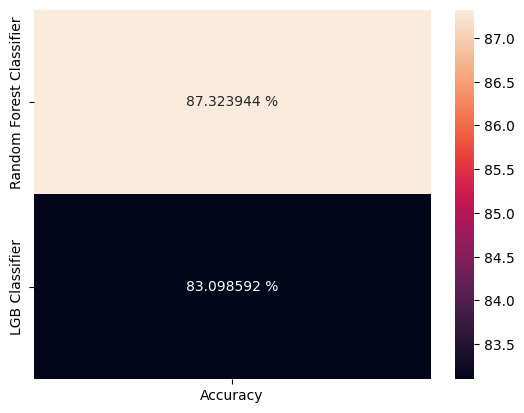

In [ ]:
ax = sns.heatmap(df,annot=True,fmt="1f")
for t in ax.texts: t.set_text(t.get_text() + " %")

In [ ]:
from sklearn.svm import SVC

In [ ]:
models_l=[('RFC',RandomForestClassifier(**best_params_rf)),('LMBMC',LGBMClassifier(**best_params_lgb),('svc' ,SVC(C = 1, gamma = 0.001)))]

## 4. **Stacking**

In [ ]:
from sklearn.linear_model import LogisticRegression
modelsc = StackingClassifier(estimators=models_l,final_estimator=LogisticRegression(),cv=10,verbose=5) 
#RandomForestClassifier(n_estimators=32)        
modelsc.fit(X_train_res,y_train_res) #final_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 an

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(bootstrap=False,
                                                       criterion='entropy',
                                                       max_depth=58,
                                                       max_features='auto',
                                                       max_leaf_nodes=9675,
                                                       n_estimators=282)),
                               ('LMBMC',
                                LGBMClassifier(learning_rate=0.26675450610988694,
                                               max_depth=8, n_estimators=460,
                                               random_state=45),
                                ('svc', SVC(C=1, gamma=0.001)))],
                   final_estimator=LogisticRegression(), verbose=5)

In [ ]:
y_pred_modelsc = modelsc.predict(X_test_res)


In [ ]:
print('Accuracy score of Test: ', accuracy_score(y_test_res, y_pred_modelsc)*100)


Accuracy score of Test:  90.14084507042254


### **Summary**

#### The code above uses a Stacking Classifier to combine multiple base classifiers and a meta-classifier to make predictions on the testing data. The accuracy obtained is 90.14%.

In [ ]:
X_test = test[rfe_feature]
X_rescaled = scl.transform(X_test)

In [ ]:
test_preds = modelsc.predict(X_rescaled) #rf_clf
submission_df = pd.concat([test['date'], pd.DataFrame(test_preds, columns=['label'])], axis=1)
submission_df.head()

,date,label
0,0001f2fd,1
1,00177dc1,1
2,00b3a048,1
3,013f131b,2
4,01a1b150,2


#### Stacking Classifier is used to predict the labels of the testing data and  a submission dataframe is created. The submission dataframe includes the date and the predicted label for each instance in the testing data. The head() function is used to display the first few rows of the submission dataframe.

In [ ]:
le_name_map={'H': 0, 'L': 1, 'N': 2}

In [ ]:
inv_map = {v: k for k, v in le_name_map.items()}
inv_map

{0: 'H', 1: 'L', 2: 'N'}

#### The categorical labels which were mapped into numeric and mapped back to categorical labels and appended into the final result dataframe.

In [ ]:
submission_df['label'] = submission_df['label'].map(inv_map)  
submission_df

,date,label
0,0001f2fd,L
1,00177dc1,L
2,00b3a048,L
3,013f131b,N
4,01a1b150,N
5,0208b16b,N
6,0247bd99,N
7,0297dfdf,L
8,03caeae7,H
9,05610ce4,N


In [ ]:
format_df = pd.read_csv("/content/drive/MyDrive/Weather_forecast/Train/solution_format.csv",sep=',')
# format_df = format_df.drop('label', inplace=True, axis=1)
# format_df.head()
del format_df["label"]

In [ ]:
format_df = format_df.merge(submission_df, on="date")
format_df
# format_df.rename(columns = {'label_y':'label'}, inplace = True)

,date,label
0,b92d713a,N
1,18817005,N
2,8e19dc3c,N
3,6f0929dc,N
4,c7506622,N
5,80aa05a6,N
6,2b6c4ffe,L
7,6d3d782c,L
8,d9cea8e0,N
9,8270822e,N


# **CONCLUSION**

###In conclusion, predicting rain with the help of machine learning is an extensive process that can benefit the likes of the agriculture industry which is heavily reliant on weather conditions, thus as is our food supply.  

### However, data for weather prediction can sometimes be vague and might require a lot of preprocessing to ensure it is a good fit for building a predictive model.   

#### The techniques used in building the machine learning model including LightGBM, Random Forest Classification, Optuna Stacking and XGBoosting provide comprehensive results and on testing does provide positive results for the respective dates on predicting rain through machine learning.